After testing my google shopping scrapper, I'm ready to move onto the next step. I'll work with a small amount of text to develop a text cleaning pipeline that I can easily modify in the future during the model selection phase.

In [27]:
from pyfuncs import scraper
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import string
import re
import pandas as pd
from yellowbrick.text import TSNEVisualizer
from yellowbrick.text import UMAPVisualizer
from yellowbrick.text import freqdist
import matplotlib.pyplot as plt

In [114]:
Shopper = scraper.Google_Shopping_Scraper(product_name='laptop', n_pages=1, n_reviews=40)

In [115]:
Shopper.get_all_pages()

could not find all reviews button
no more review page buttons
no more review page buttons
no more review page buttons
no more review page buttons
no more review page buttons
no more review page buttons
couldn"t find review table
could not find review.
could not fetch review rating


UnboundLocalError: local variable 'review' referenced before assignment

In [2]:
def cleaner(corpus):
    '''Takes in a corpus (list) and returns cleaned text'''
    #remove punctuation
    clean_text = [text.translate(str.maketrans('', '', string.punctuation)) for text in corpus]
    #lowercase
    clean_text = [text.lower() for text in clean_text]
    #remove numbers
    clean_text = [re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text) for text in clean_text]
    
    return clean_text

def count_vectorize(cleaned_corpus):
    """Takes in a corpus and returns document term matrix and tokenizer"""
    cv = CountVectorizer(stop_words='english')
    document_term_sparse_matrix = cv.fit_transform(cleaned_corpus)
    return pd.DataFrame(document_term_sparse_matrix.toarray(), columns=cv.get_feature_names()), cv

def tfidf_vectorize(cleaned_corpus):
    """returns Term Freq Inver Doc Freq Tokenization and tokenizer"""
    tfidf = TfidfVectorizer(stop_words='english')
    X_tfidf = tfidf.fit_transform(clean_corpus)
    return pd.DataFrame(X_tfidf.toarray(), columns = tfidf.get_feature_names()), tfidf

In [3]:
corpus_df = pd.read_pickle('laptop_corpus.pkl')

In [4]:
corpus = corpus_df['review']
clean_corpus = cleaner(corpus)
tfi_df, tfidf_tokenizer = tfidf_vectorize(clean_corpus)
tokens = pd.concat([corpus_df, tfi_df], axis=1)

In [5]:
# corpus_df.to_pickle('laptop_corpus.pkl')

Now lets dig in and take a look at the data! First, I'd like to take a look at the seperability of sentiment of each of the reviews by looking at the corpus' T-SNE projection with targets of each of the review scores.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

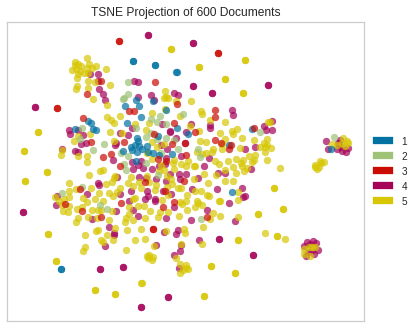

In [6]:
X = tfi_df
y = tokens['review_ratings']
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show();

Now I'll look at positive, negative, and neutral classes.

In [31]:
def get_pos_neg_neut(y):
    y_new = []
    y = [int(yi) for yi in y]
    for yi in y:
        if yi < 3:
            #negative class
            y_new.append(-1)
        if yi > 3:
            #positive class
            y_new.append(1)
        if yi == 3:
            #nuetral class
            y_new.append(0)
    return y_new

y_new = get_pos_neg_neut(y)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


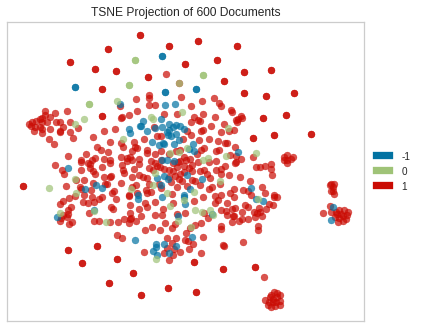

In [8]:
tsne = TSNEVisualizer()
tsne.fit(X, y_new)
tsne.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


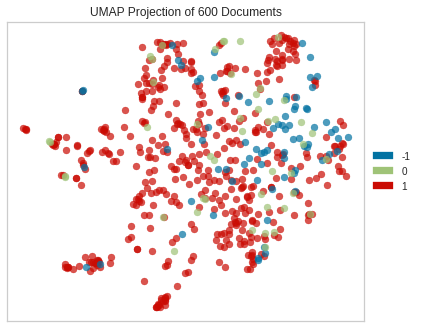

In [9]:
viz = UMAPVisualizer()
viz.fit(X, y_new)
viz.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


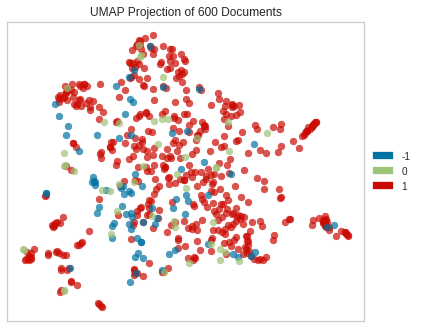

In [10]:
viz = UMAPVisualizer(metric='cosine')
viz.fit(X, y_new)
viz.show();

We're definitely seeing some potential for sentiment analysis! I'm just going to run a quick model.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


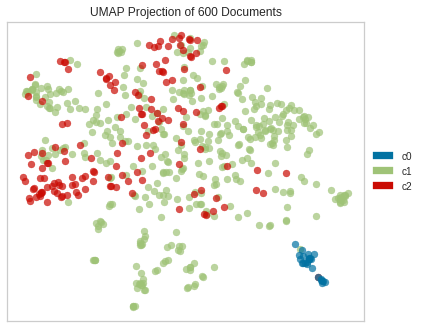

In [13]:
clusters = KMeans(n_clusters=3) #one cluster for each of the sentiment classes
clusters.fit(X)

umap = UMAPVisualizer()
umap.fit(X, ["c{}".format(c) for c in clusters.labels_])
umap.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


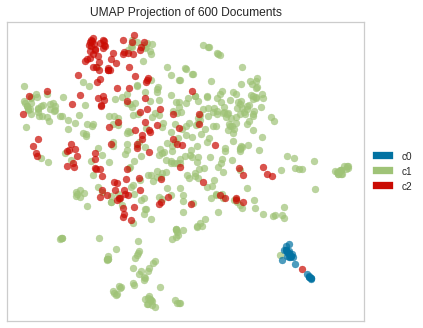

In [22]:
umap = UMAPVisualizer(metric = 'cosine')
umap.fit(X, ["c{}".format(c) for c in clusters.labels_])
umap.show()

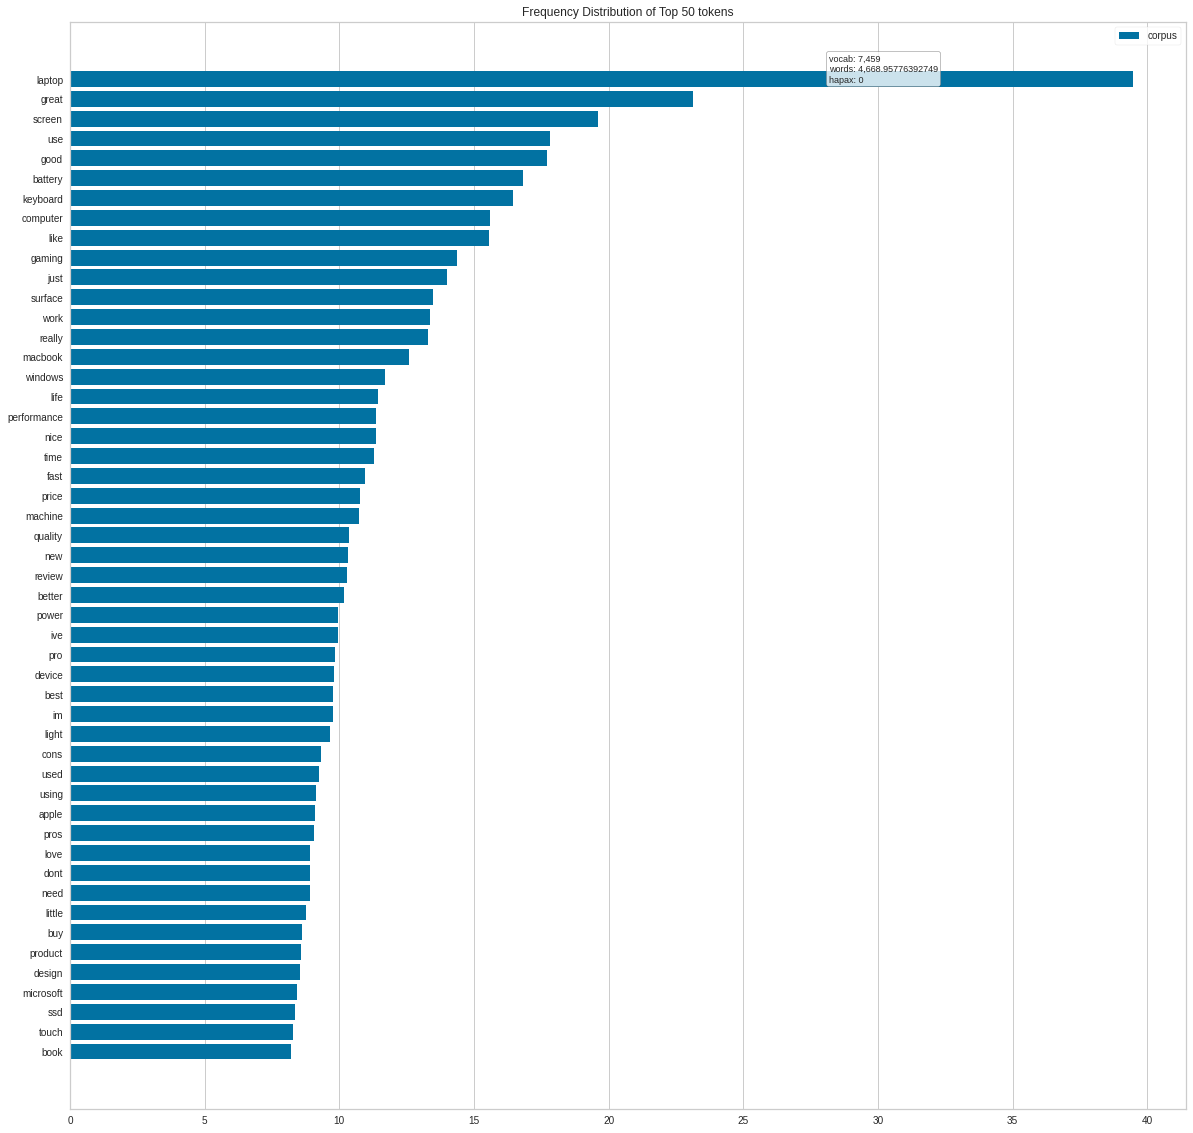

In [34]:
tokens, cv = count_vectorize(clean_corpus)
plt.figure(figsize=(20,20))
fd = freqdist(cv.get_feature_names(), X)

In [66]:
pos_mask = [ix for ix, yi in enumerate(y_new) if yi == 1]
neg_mask = [ix for ix, yi in enumerate(y_new) if yi == -1]
neut_mask = [ix for ix, yi in enumerate(y_new) if yi == 0]

In [67]:
y_new = np.array(y_new)
X = np.array(X)

In [68]:
X_neg = X[neg_mask]
X_pos = X[pos_mask]
X_neut = X[neut_mask]

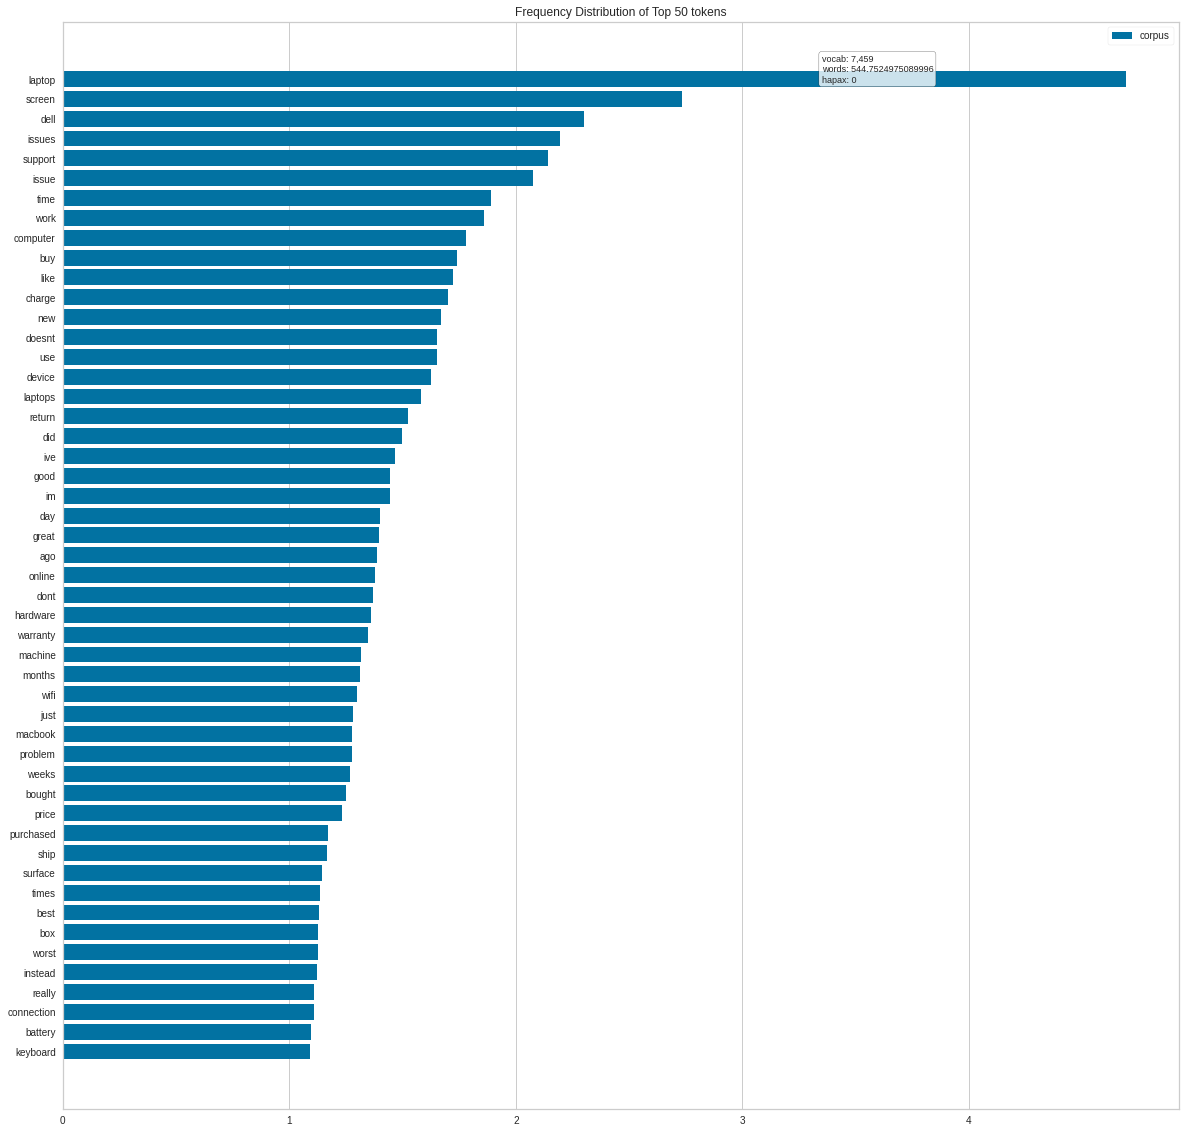

In [69]:
plt.figure(figsize=(20,20))
fd = freqdist(cv.get_feature_names(), X_neg)

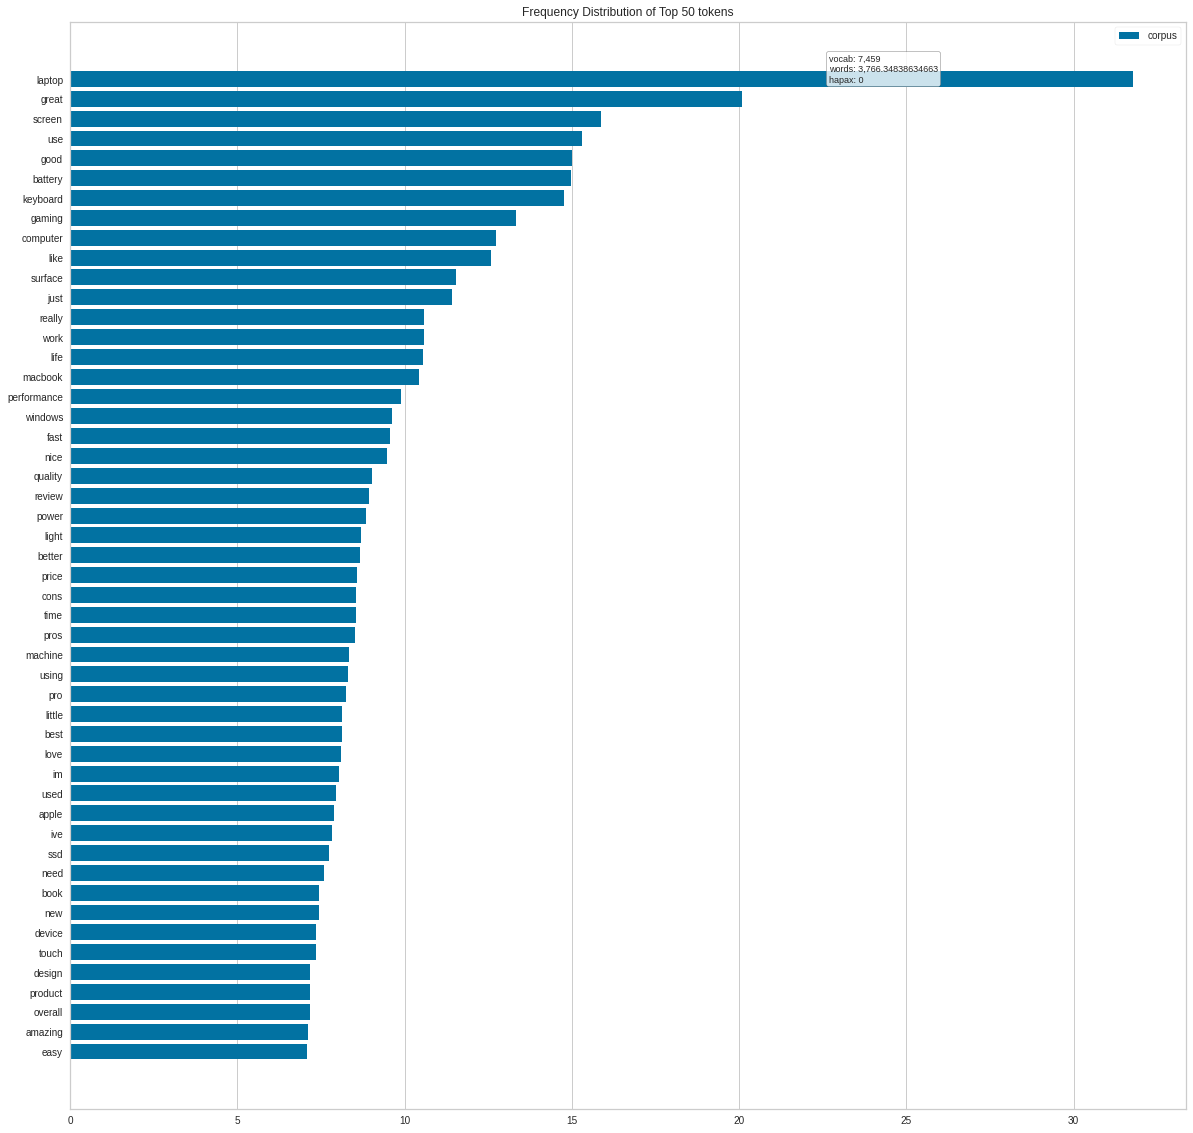

In [70]:
plt.figure(figsize=(20,20))
fd = freqdist(cv.get_feature_names(), X_pos)

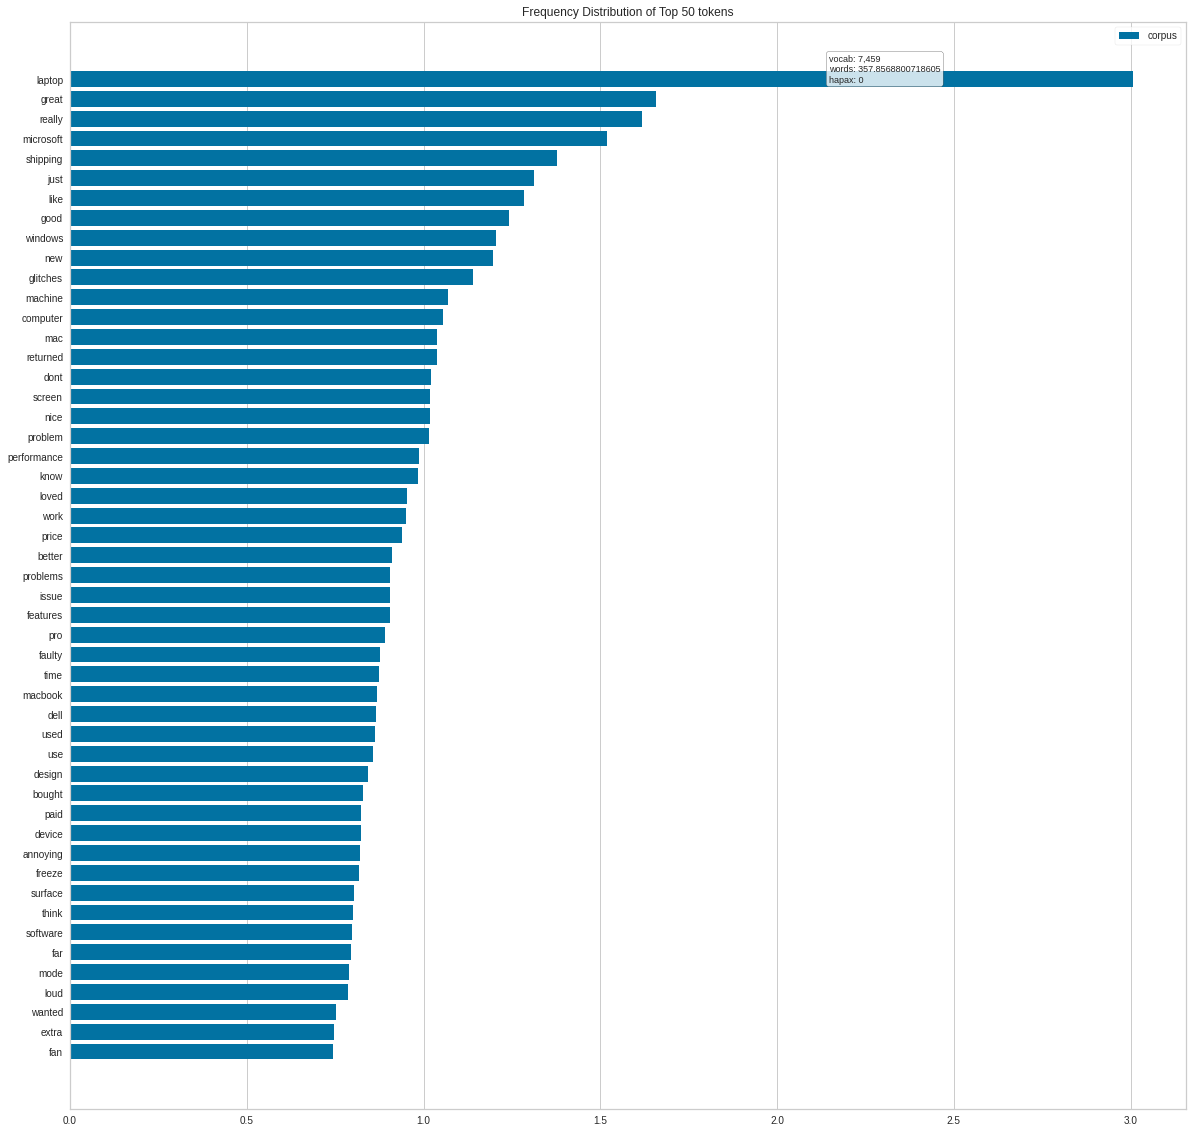

In [71]:
plt.figure(figsize=(20,20))
fd = freqdist(cv.get_feature_names(), X_neut)